https://github.com/ContinuumIO/gtc2017-numba/blob/master/2%20-%20CUDA%20Basics.ipynb

In [7]:
from numba import jit
import math

@jit
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

# hypot = jit(hypot)

In [8]:
hypot(3.0, 4.0)

5.0

In [9]:
hypot.py_func(3.0, 4.0)

5.0

In [10]:
%timeit hypot.py_func(3.0, 4.0)

978 ns ± 15 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
%timeit hypot(3.0, 4.0)

173 ns ± 0.37 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [12]:
%timeit math.hypot(3.0, 4.0)

177 ns ± 0.456 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
hypot.inspect_types()

hypot (float64, float64)
--------------------------------------------------------------------------------
# File: <ipython-input-7-57e97cad5353>
# --- LINE 4 --- 
# label 0

@jit

# --- LINE 5 --- 

def hypot(x, y):

    # --- LINE 6 --- 

    # Implementation from https://en.wikipedia.org/wiki/Hypot

    # --- LINE 7 --- 
    #   x = arg(0, name=x)  :: float64
    #   y = arg(1, name=y)  :: float64
    #   $0.1 = global(abs: <built-in function abs>)  :: Function(<built-in function abs>)
    #   $0.3 = call $0.1(x, func=$0.1, args=[Var(x, <ipython-input-7-57e97cad5353> (7))], kws=(), vararg=None)  :: (float64,) -> float64
    #   del x
    #   del $0.1
    #   x.1 = $0.3  :: float64
    #   del $0.3

    x = abs(x);

    # --- LINE 8 --- 
    #   $0.4 = global(abs: <built-in function abs>)  :: Function(<built-in function abs>)
    #   $0.6 = call $0.4(y, func=$0.4, args=[Var(y, <ipython-input-7-57e97cad5353> (7))], kws=(), vararg=None)  :: (float64,) -> float64
    #   del y
    #   de

In [14]:
@jit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

'value'

In [15]:
@jit(nopython=True)
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x000001AAD6BC91D0>:
--%<----------------------------------------------------------------------------
Traceback (most recent call last):
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\errors.py", line 617, in new_error_context
    yield
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\typeinfer.py", line 198, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\typeinfer.py", line 141, in propagate
    constraint(typeinfer)
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\typeinfer.py", line 199, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\errors.py", line 625, in new_error_context
    six.reraise(type(newerr), newerr, tb)
  File "D:\Users\artur\Anaconda3\envs\Recommendations_ar\lib\site-packages\numba\six.py", line 659, in reraise
    raise value
numba.errors.InternalError: [1m[1m[0m
[0m[1m[1] During: typing of argument at <ipython-input-15-42c374763781> (3)[0m
--%<----------------------------------------------------------------------------

[1m
File "<ipython-input-15-42c374763781>", line 3:[0m
[1mdef cannot_compile(x):
[1m    return x['key']
[0m    [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mcannot determine Numba type of <class 'dict'>[0m

This is not usually a problem with Numba itself but instead often caused by
the use of unsupported features or an issue in resolving types.

To see Python/NumPy features supported by the latest release of Numba visit:
http://numba.pydata.org/numba-doc/dev/reference/pysupported.html
and
http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

For more information about typing errors and how to debug them visit:
http://numba.pydata.org/numba-doc/latest/user/troubleshoot.html#my-code-doesn-t-compile

If you think your code should work with Numba, please report the error message
and traceback, along with a minimal reproducer at:
https://github.com/numba/numba/issues/new


### Exercise

Below is a function that loops over two input NumPy arrays and puts their sum into the output array. Modify this function to call the hypot function we defined above. We will learn a more efficient way to write such functions in a future section.

(Make sure to execute all the cells in this notebook so that hypot is defined.)


In [16]:
@jit(nopython=True)
def ex1(x, y, out):
    for i in range(x.shape[0]):
        out[i] = x[i] + y[i]

In [17]:
import numpy as np

in1 = np.arange(10, dtype=np.float64)
in2 = 2 * in1 + 1
out = np.empty_like(in1)

print('in1:', in1)
print('in2:', in2)

ex1(in1, in2, out)

print('out:', out)

in1: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
in2: [  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.]
out: [  1.   4.   7.  10.  13.  16.  19.  22.  25.  28.]


In [21]:
@jit(nopython=True)
def ex1(x, y, out):
    for i in range(x.shape[0]):
        out[i] = hypot(int(x[i]), int(y[i]))

In [22]:
# This test will fail until you fix the ex1 function
np.testing.assert_almost_equal(out, np.hypot(in1, in2))

AssertionError: 
Arrays are not almost equal to 7 decimals

(mismatch 90.0%)
 x: array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.])
 y: array([  1.       ,   3.1622777,   5.3851648,   7.6157731,   9.8488578,
        12.083046 ,  14.3178211,  16.5529454,  18.7882942,  21.023796 ])

In [23]:
from numba import vectorize

@vectorize(['int64(int64, int64)'], target='cuda')
def add_ufunc(x, y):
    return x + y

In [37]:
import numpy as np

a = np.array([1, 2, 3, 4], dtype='int64')
b = np.array([10, 20, 30, 40], dtype='int64')

print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
c = np.arange(4*4, dtype='int64').reshape((4,4))
print('c:', c)

np.add(b, c)

c: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[10, 21, 32, 43],
       [14, 25, 36, 47],
       [18, 29, 40, 51],
       [22, 33, 44, 55]], dtype=int64)

In [39]:
# transpozycja macierzy b
b_col = b[:, np.newaxis]
b_col

array([[10],
       [20],
       [30],
       [40]], dtype=int64)

In [41]:
print('a+b:\n', add_ufunc(a, b))
print()
print('b_col + c:\n', add_ufunc(b_col, c))

a+b:
 [11 22 33 44]

b_col + c:
 [[10 11 12 13]
 [24 25 26 27]
 [38 39 40 41]
 [52 53 54 55]]


In [44]:
%timeit np.add(b_col, c)   # NumPy on CPU

1.65 µs ± 7.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
%timeit add_ufunc(b_col, c) # Numba on GPU

1.34 ms ± 6.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
import math  # Note that for the CUDA target, we need to use the scalar functions from the math module, not NumPy

SQRT_2PI = np.float32((2*math.pi)**0.5)  # Precompute this constant as a float32.  Numba will inline it at compile time.

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [47]:
# Evaluate the Gaussian a million times!
x = np.random.uniform(-3, 3, size=1000000).astype(np.float32)
mean = np.float32(0.0)
sigma = np.float32(1.0)

# Quick test
gaussian_pdf(x[0], 0.0, 1.0)

array([ 0.03311109], dtype=float32)

In [48]:
import scipy.stats # for definition of gaussian distribution
norm_pdf = scipy.stats.norm
%timeit norm_pdf.pdf(x, loc=mean, scale=sigma)

86.3 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit gaussian_pdf(x, mean, sigma)

6.93 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)




Note that the CUDA compiler aggressively inlines device functions, so there is generally no overhead for function calls. Similarly, the "tuple" returned by polar_to_cartesian is not actually created as a Python object, but represented temporarily as a struct, which is then optimized away by the compiler.

# # Allowed Python on the GPU

Compared to Numba on the CPU (which is already limited), Numba on the GPU has more limitations. Supported Python includes:

- if/elif/else
- while and for loops
- Basic math operators
- Selected functions from the math and cmath modules
- Tuples

See the Numba manual for more details.

## Exercise

Let's build a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. Let's make some sample data:


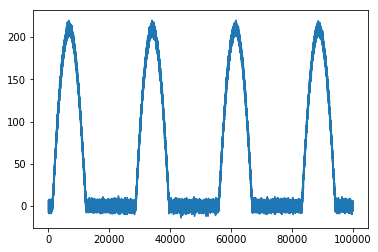

In [57]:
# Hacking up a noisy pulse train
from matplotlib import pyplot as plt
%matplotlib inline

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

In [59]:
print(type(waveform))

<class 'numpy.ndarray'>


In [60]:
waveform

array([ 6,  0,  2, ..., -6,  0,  6], dtype=int16)

Now try filling in body of this ufunc:

In [70]:
from numba import cuda

# @cuda.jit(device=True)
# def cut_threshold(waveform_value, threshold):
#     out = np.empty_like(waveform_value)
#     for i, v in enumerate(waveform_value):
#         if v < threshold:
#             v = threshold
#             out[i] = threshold
#         else:
#             out[i] = v
            
#     return out

@vectorize(['int16(int16, int16)'], target='cuda')
def zero_suppress(waveform_value, threshold):
    if abs(waveform_value) >= threshold:
        return waveform_value
    else:
        return 0.0

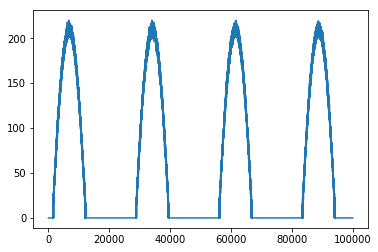

In [71]:
# the noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15.0))

In [72]:
print(type(zero_suppress(waveform, 15.0)))

<class 'numpy.ndarray'>


https://numba.pydata.org/numba-examples/examples/waveforms/zero_suppression/results.html